GlowScript 3.0 VPython

coded in trinket.io

G=6.6e-11
m1=8e30
m2=2e30 # earth
rdist=2e10
M=m1+m2
x1=-(m2/M)*rdist
x2=(m1/M)*rdist

star1=sphere(pos=vector(x1,0,0), radius=2e9, color=color.yellow, make_trail=True)
star2=sphere(pos=vector(x2,0,0), radius=8e8, color=color.cyan, make_trail=True)
com = sphere(pos=(star1.pos*m1+star2.pos*m2)/M, radius=2e8)
r=star2.pos-star1.pos
v1circle=sqrt(G*m2*mag(star1.pos)/mag(r)**2)

star1.v=vector(0,0.5*v1circle,0)
star1.p=m1*star1.v
star2.p=-star1.p # because of momentum conservation

mu=m1*m2/M
l=mag(cross(star1.pos,star1.p)+cross(star2.pos,star2.p))

t=0
dt=1000
while t<2e6:
  rate(100)
  r=star2.pos-star1.pos
  F2=-G*m1*m2*norm(r)/mag(r)**2
  star2.p=star2.p+F2*dt
  star1.p=star1.p-F2*dt
  star1.pos=star1.pos+star1.p*dt/m1
  star2.pos=star2.pos+star2.p*dt/m2
  t=t+dt

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter

In [150]:
# defining my constants
m1 = 1
m2 = 3
G = 1

# initial condition

x1_0 = 1 # initial position is one earth-sun distance away from the sun
y1_0 = 0
x2_0 = 0
y2_0 = 0
vx1_0 = 0
vy1_0 = np.sqrt(G*m2/x1_0) #circular motion v=sqrt(a*r) with a=m2 (since G=1, r12=1)
vx2_0 = 0
vy2_0 = -(m1*vy1_0/m2)
com = (m1*x1_0 + m2*x2_0)/(m1+m2)
S_0 = [x1_0, y1_0, x2_0, y2_0, vx1_0, vy1_0, vx2_0, vy2_0]

In [151]:
def dSdt(S,t):
    x1, y1, x2, y2, vx1, vy1, vx2, vy2 = S
    r12 = np.sqrt((x1-x2)**2 + (y1-y2)**2)
    return [vx1,
           vy1,
           vx2,
           vy2,
           m2/r12**3 * (x2 - x1),
           m2/r12**3 * (y2 - y1),
           m1/r12**3 * (x1 - x2),
           m1/r12**3 * (y1 - y2)]

In [152]:
t = np.linspace(0,20,10000)
sol = odeint(dSdt, y0=S_0, t=t)

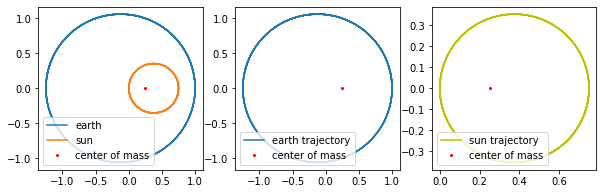

In [153]:
x1 = sol.T[0]
y1 = sol.T[1]
x2 = sol.T[2]
y2 = sol.T[3]

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10,3))
ax1.plot(x1,y1, label='earth')
ax1.plot(x2,y2, label='sun')
ax1.plot(com, 0, 'ro',ms=2,label='center of mass')
ax1.legend(loc = 'lower left')

ax2.plot(x1,y1, label='earth trajectory')
ax2.plot(com, 0, 'ro',ms=2,label='center of mass')
ax2.legend(loc='lower left')

ax3.plot(x2,y2, c='y', label='sun trajectory')
ax3.plot(com, 0, 'ro',ms=2,label='center of mass')
ax3.legend(loc='lower left')